In [1]:

import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# if your Jupyter kernel crashes during this code, use this setting
# import os
# os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("../Datasets/META stocks.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.084515,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,33.900501,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,30.882032,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,31.878227,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,32.904308,50237200


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3186.000000,3186.000000,3186.000000,3186.000000,3186.000000,3.186000e+03
mean,186.993983,189.388905,184.632693,187.066114,186.438467,2.928538e+07
std,132.340763,133.933605,130.660796,132.345106,132.074638,2.575548e+07
min,18.080000,18.270000,17.549999,17.730000,17.662531,4.726100e+06
25%,88.697502,89.837500,87.494997,88.410002,88.073563,1.542828e+07
50%,165.914993,168.315002,163.750000,166.010002,165.378258,2.167915e+07
75%,246.732498,250.099995,244.490002,246.822506,245.883259,3.341255e+07
max,631.700012,638.400024,627.210022,632.679993,632.170044,5.735764e+08


In [4]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# scale only relevant variables
num_cols = ['Open', 'High', 'Low','Close', 'Volume']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,0.039063,0.043104,0.033543,0.033336,38.084515,1.000000
1,2012-05-21,0.030067,0.029655,0.025342,0.026506,33.900501,0.287363
2,2012-05-22,0.023679,0.024704,0.021963,0.021579,30.882032,0.170626
3,2012-05-23,0.021658,0.022947,0.022652,0.023205,31.878227,0.121076
4,2012-05-24,0.024233,0.024092,0.023324,0.024880,32.904308,0.080005


In [6]:
# let's use the sequence number instead of the time stamp
# starting from 1 until the final row
df['sequence'] = df.index + 1
df = df.drop(['Date'], axis=1)

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,sequence
0,0.039063,0.043104,0.033543,0.033336,38.084515,1.000000,1
1,0.030067,0.029655,0.025342,0.026506,33.900501,0.287363,2
2,0.023679,0.024704,0.021963,0.021579,30.882032,0.170626,3
3,0.021658,0.022947,0.022652,0.023205,31.878227,0.121076,4
4,0.024233,0.024092,0.023324,0.024880,32.904308,0.080005,5


In [8]:

df.tail()

,Open,High,Low,Close,Adj Close,Volume,sequence
3181,0.959910,0.952542,0.952826,0.960403,608.330017,0.010651,3182
3182,0.956602,0.946930,0.936588,0.937507,594.250000,0.015596,3183
3183,0.964978,0.974296,0.966030,0.974697,617.119995,0.018982,3184
3184,0.967081,0.964282,0.971295,0.965233,611.299988,0.006380,3185
3185,0.987533,0.978343,0.961388,0.967623,612.770020,0.022006,3186


In [9]:
from numpy.lib.stride_tricks import sliding_window_view

timestep_size = 50
open_windows = sliding_window_view(df['Open'].values, timestep_size)
close_windows = sliding_window_view(df['Close'].values, timestep_size)

X = np.vstack((open_windows, close_windows))
y = np.array([0] * len(open_windows) + [1] * len(close_windows))


In [10]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=42)


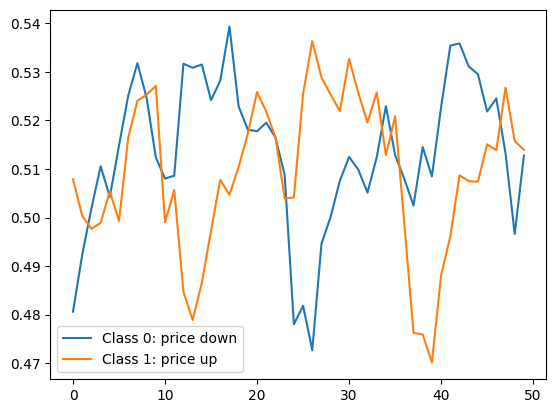

In [11]:
test_signal_index = 2

c_x_train = X[y == 0]
plt.plot(c_x_train[test_signal_index], label="Class 0: price down")

c_x_train = X[y == 1]
plt.plot(c_x_train[test_signal_index], label="Class 1: price up")
plt.legend()

In [12]:
train_size = 0.7
splitter = int(len(X) * train_size)

# split to train/test
x_train = X[0:splitter]
x_test = X[splitter:]
y_train = y[0:splitter]
y_test = y[splitter:]

In [13]:

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

4391
1883
4391
1883


In [14]:
#convert the data into the required CNN -format
# usually the easiest approach is to modify
# your own dataset to follow the data format used by another example
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [15]:
x_train

array([[[0.04393853],
        [0.04322303],
        [0.04029596],
        ...,
        [0.04569478],
        [0.04655663],
        [0.04667046]],

       [[0.29775755],
        [0.2766696 ],
        [0.28952772],
        ...,
        [0.27538215],
        [0.28437795],
        [0.29166259]],

       [[0.29513378],
        [0.28861509],
        [0.29210261],
        ...,
        [0.25328379],
        [0.24674881],
        [0.24265831]],

       ...,

       [[0.19497409],
        [0.1969134 ],
        [0.19658747],
        ...,
        [0.21516573],
        [0.21172712],
        [0.2063818 ]],

       [[0.10252866],
        [0.10628506],
        [0.10714693],
        ...,
        [0.11566794],
        [0.11423694],
        [0.11428572]],

       [[0.3231645 ],
        [0.31939182],
        [0.32077406],
        ...,
        [0.23743395],
        [0.22655501],
        [0.22460364]]], shape=(4391, 50, 1))

In [16]:
class_names = np.array(['down', 'up'])
num_classes = len(class_names)
classes = [0, 1]

def make_model(input_shape):
    model = keras.Sequential(
        [
            # input layer
            keras.layers.Input(input_shape),

            # convolutional layer 1 (we usually have 1-3 convolutional layers
            # depending how much and how complex the data is) -> "model capacity / decision space"
            keras.layers.Conv1D(filters=64, kernel_size=3, padding="same"),
            keras.layers.BatchNormalization(),
            keras.layers.ReLU(),

            # pooling + flatten (adapter from convolutional to dense)
            # flattening is done only once after the final convolutional layer 
            # and before the Dense-network
            keras.layers.GlobalAveragePooling1D(),
            keras.layers.Flatten(),

            # neural network Dense-tail
            keras.layers.Dense(64, activation="relu"),

            # output layer
            keras.layers.Dense(num_classes, activation="softmax")
        ]
    )

    return model


model = make_model(input_shape=x_train.shape[1:])

# pip install pydot -> restart Jupyter kernel after this
# keras.utils.plot_model(model, show_shapes=True)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 50, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 50, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,802 (18.76 KB)

 Trainable params: 4,674 (18.26 KB)

 Non-trainable params: 128 (512.00 B)

In [17]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model2.keras", save_best_only=True, monitor="val_loss"
    )
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6969 - sparse_categorical_accuracy: 0.5162 - val_loss: 0.6937 - val_sparse_categorical_accuracy: 0.5040
Epoch 2/500
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6997 - sparse_categorical_accuracy: 0.5037 - val_loss: 0.6932 - val_sparse_categorical_accuracy: 0.5040
Epoch 3/500
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6959 - sparse_categorical_accuracy: 0.4937 - val_loss: 0.6932 - val_sparse_categorical_accuracy: 0.5006
Epoch 4/500
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6972 - sparse_categorical_accuracy: 0.5020 - val_loss: 0.6942 - val_sparse_categorical_accuracy: 0.5040
Epoch 5/500
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6964 - sparse_categorical_accuracy: 0.4994 - val_loss: 0.6936 - val_sparse_categorical_accuracy: 0.5040
Epoch 6/500
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6949 - sparse_categorical_accuracy: 0.5085 - val_loss: 0.6981 - val_sparse_categorical_accuracy: 0.499

<Axes: >

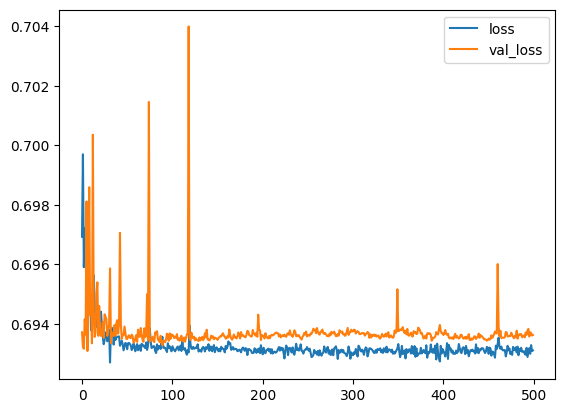

In [18]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

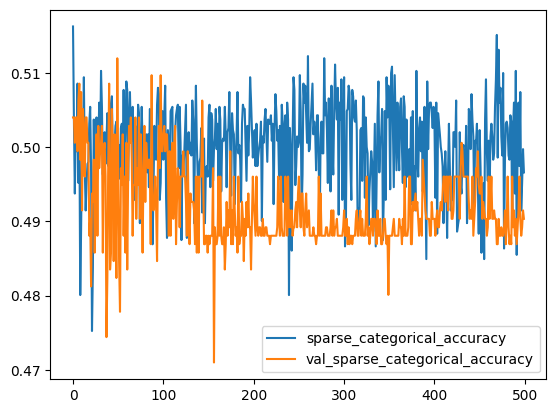

In [19]:
loss_df[['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot()


In [20]:
model = keras.models.load_model("best_model2.keras")

In [21]:
print("Test data evaluation:")
print(model.evaluate(x_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(x_train, y_train, verbose=0))

Test data evaluation:
[0.6936538815498352, 0.48911312222480774]

Train data evaluation:
[0.693075954914093, 0.5051240921020508]


In [22]:
# get predictions and convert with argmax() to get categories 
# instead of raw probabilities
test_predictions = model.predict(x_test)
test_predictions = np.argmax(test_predictions, axis=1)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Axes: >

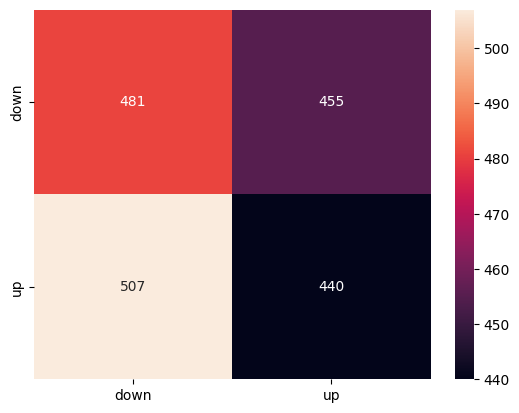

In [23]:
# confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g', 
            xticklabels=class_names, yticklabels=class_names)

In [24]:
# print the classification report based on true values and predictions
print(classification_report(y_test, test_predictions, target_names=class_names))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

        down       0.49      0.51      0.50       936
          up       0.49      0.46      0.48       947

    accuracy                           0.49      1883
   macro avg       0.49      0.49      0.49      1883
weighted avg       0.49      0.49      0.49      1883


Model overall accuracy: 48.91%


0
down


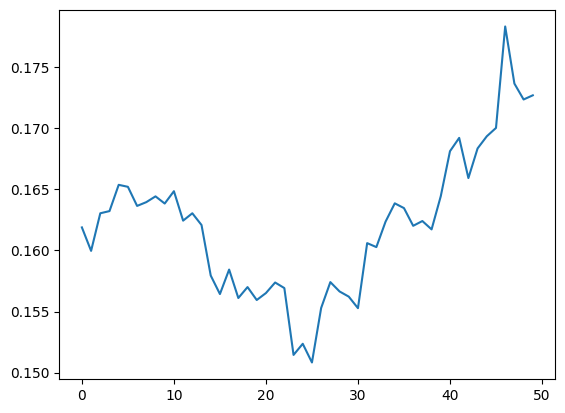

In [25]:
signal_index = 8
print(y_test[signal_index])
print(class_names[y_test[signal_index]])

plt.figure()
plt.plot(x_test[signal_index])
plt.show()

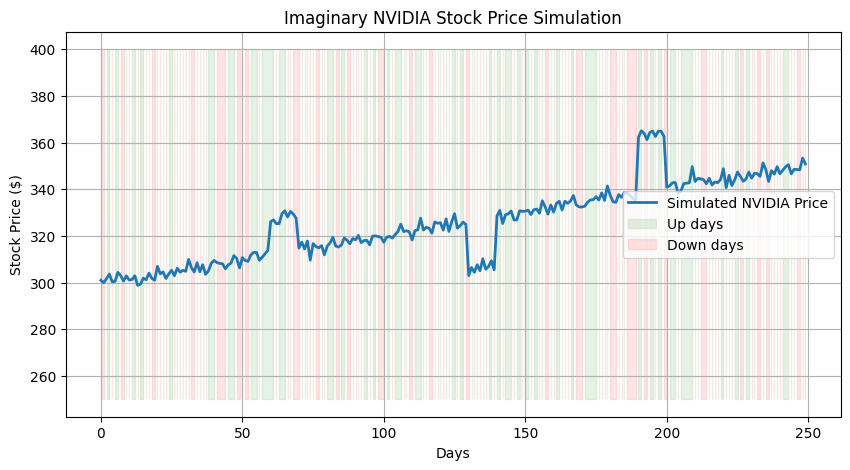

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time axis (e.g., 250 trading days ~ 1 year)
days = np.arange(250)

# Base trend — start around $300 and slowly increase
np.random.seed(42)
base_price = 300 + np.linspace(0, 50, len(days))  # Upward drift

# Add realistic market-like random noise
noise = np.random.normal(0, 2, size=days.shape)  # ±2 dollar fluctuations

# Add some "market event" spikes — big upward and downward movements
price = base_price + noise
price[60:70] += 15   # first strong upward rally
price[130:140] -= 20  # correction / drop
price[190:200] += 25  # second upward rally

# Optional: Clip to realistic price range
price = np.clip(price, 250, 400)

# Compute daily movement direction (your binary target)
movement = (np.diff(price, prepend=price[0]) > 0).astype(int)

# Plot the signal
plt.figure(figsize=(10, 5))
plt.plot(days, price, label='Simulated NVIDIA Price', linewidth=2)
plt.fill_between(days, 250, 400, where=movement==1, color='green', alpha=0.1, label='Up days')
plt.fill_between(days, 250, 400, where=movement==0, color='red', alpha=0.1, label='Down days')
plt.xlabel('Days')
plt.ylabel('Stock Price ($)')
plt.title('Imaginary NVIDIA Stock Price Simulation')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
# TRY OUR IMAGINARY WIND SIGNAL WITH THE MODEL

# wrap up the data points into the required NumPy-format
points = y
test_signal = np.expand_dims(points, axis=1)
test_batch = np.array([test_signal])

# create prediction
test_predict = model.predict(test_batch)
print(test_predict)

# get highest index and print name
index = np.argmax(test_predict)
print(class_names[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[0.6397003 0.3602997]]
down


0
down


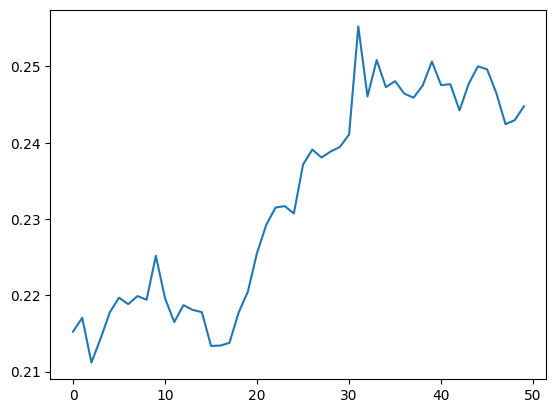

In [28]:
# example signal from test data
# MEAN TEMPERATURE
signal_index = 22
print(y_test[signal_index])
print(class_names[y_test[signal_index]])

plt.figure()
plt.plot(x_test[signal_index])
plt.show()

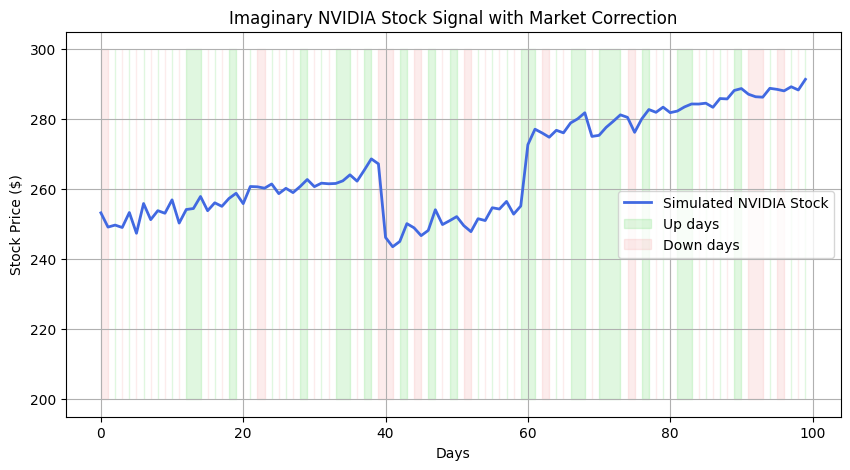

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated "days"
days = np.arange(100)

# Base trend (price slowly rising)
np.random.seed(1)
base_price = 250 + np.linspace(0, 40, len(days))  # Upward trend from $250 to ~$290

# Random daily noise (market variation)
noise = np.random.normal(0, 2, size=days.shape)

# Simulate a "valley" (market correction / dip)
price = base_price + noise
price[40:60] -= 20 + np.random.normal(0, 1, size=20)  # correction dip

# Clip to realistic limits
price = np.clip(price, 200, 300)

# Compute binary movement (1 = up, 0 = down)
movement = (np.diff(price, prepend=price[0]) > 0).astype(int)

# Plot simulated signal
plt.figure(figsize=(10, 5))
plt.plot(days, price, label='Simulated NVIDIA Stock', color='royalblue', linewidth=2)
plt.fill_between(days, 200, 300, where=movement==1, color='limegreen', alpha=0.15, label='Up days')
plt.fill_between(days, 200, 300, where=movement==0, color='lightcoral', alpha=0.15, label='Down days')
plt.xlabel('Days')
plt.ylabel('Stock Price ($)')
plt.title('Imaginary NVIDIA Stock Signal with Market Correction')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
# TRY OUR IMAGINARY MEAN TEMPERATURE SIGNAL WITH THE MODEL

# wrap up the data points into the required NumPy-format
points = y
test_signal = np.expand_dims(points, axis=1)
test_batch = np.array([test_signal])

# create prediction
test_predict = model.predict(test_batch)
print(test_predict)

# get highest index and name for this prediction
index = np.argmax(test_predict)
print(class_names[index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.6397003 0.3602997]]
down
